- Plot the outliers.
- Which variables would you delete and why ?
- Represent the number of properties according to their surface using a histogram.
- In your opinion, which 5 variables are the most important and why?
- What are the **most** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **most** expensive municipalities in Flanders? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Belgium? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Wallonia? (Average price, median price, price per square meter)
- What are the **less** expensive municipalities in Flanders? (Average price, median price, price per square meter)

Correlation with ConstructionYear:
                  ConstructionYear     Price
ConstructionYear          1.000000  0.117561
Price                     0.117561  1.000000

Correlation with PEB:
                  ConstructionYear     PEB_A    PEB_A+   PEB_A++  PEB_A/A+  \
ConstructionYear          1.000000  0.056607 -0.013022  0.017656  0.000807   
PEB_A                     0.056607  1.000000 -0.052000 -0.029403 -0.002100   
PEB_A+                   -0.013022 -0.052000  1.000000 -0.010051 -0.000718   
PEB_A++                   0.017656 -0.029403 -0.010051  1.000000 -0.000406   
PEB_A/A+                  0.000807 -0.002100 -0.000718 -0.000406  1.000000   
PEB_B                     0.081895 -0.167766 -0.057347 -0.032426 -0.002316   
PEB_B/A                  -0.002701 -0.009471 -0.003237 -0.001830 -0.000131   
PEB_C                     0.023271 -0.148980 -0.050926 -0.028795 -0.002056   
PEB_D                    -0.007064 -0.130427 -0.044583 -0.025209 -0.001800   
PEB_E                    -0

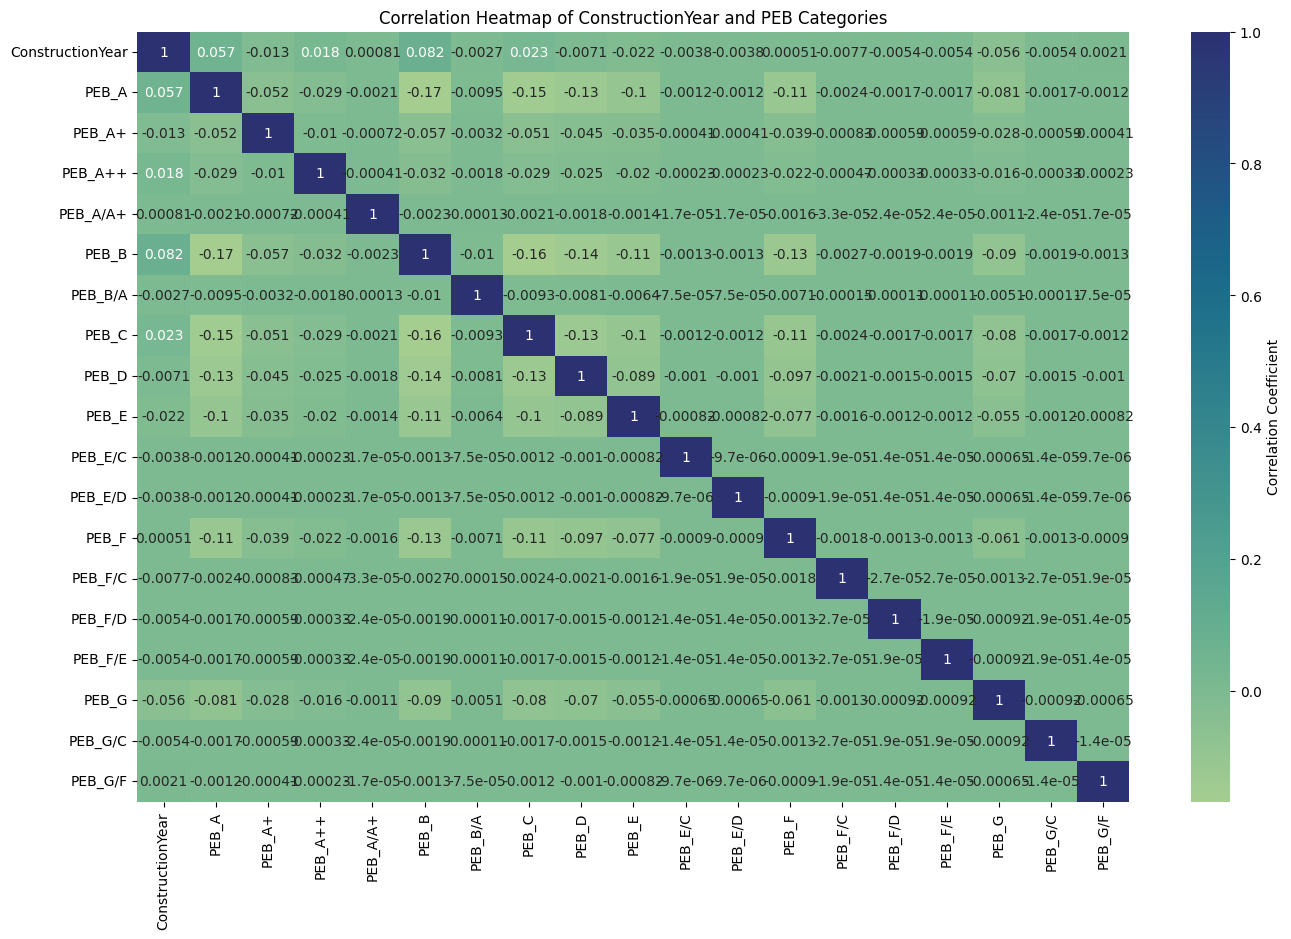

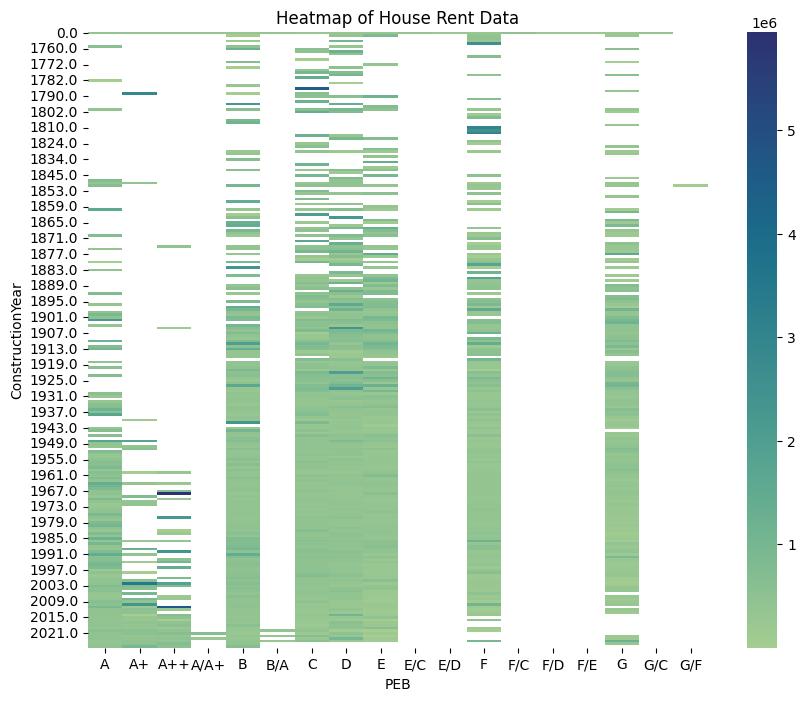

In [42]:
import os
import sys
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("utils"), '..')))

from utils.save_read import read_to_df
data = read_to_df("../data/clean_dataset.csv", "csv")

# agg_data = data.groupby(['ConstructionYear', 'PEB']).agg({"Price" : 'mean'}).reset_index()

# # Pivot the aggregated data
# pivot_data = agg_data.pivot(index="ConstructionYear", columns="PEB", values="Price")

# correlation_construction_year = data[['ConstructionYear', 'Price']].corr()
# correlation_peb = pd.get_dummies(data[['PEB', 'ConstructionYear']], columns=['PEB']).corr()

# print("Correlation with ConstructionYear:")
# print(correlation_construction_year)

# print("\nCorrelation with PEB:")
# print(correlation_peb)

# plt.figure(figsize=(16, 10))
# sns.heatmap(correlation_peb, annot=True, cmap="crest", cbar_kws={'label': 'Correlation Coefficient'})
# plt.title("Correlation Heatmap of ConstructionYear and PEB Categories")

# # Create a heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(pivot_data, cmap="crest")
# plt.title("Heatmap of House Rent Data")
# plt.show()


Correlation Matrix for Numerical Columns:
                  BathroomCount  BedroomCount  ConstructionYear  GardenArea  \
BathroomCount          1.000000      0.455059          0.092273    0.005660   
BedroomCount           0.455059      1.000000          0.022668    0.002666   
ConstructionYear       0.092273      0.022668          1.000000   -0.003838   
GardenArea             0.005660      0.002666         -0.003838    1.000000   
LivingArea             0.412128      0.648388          0.026846    0.005067   
MonthlyCharges         0.023277     -0.060350         -0.021505   -0.000532   
NumberOfFacades        0.144909      0.264472          0.116446    0.004527   
Price                  0.379990      0.371204          0.117561    0.003361   
RoomCount              0.048287      0.101054          0.025101   -0.001379   
ShowerCount            0.193901      0.233752          0.019315   -0.001175   
SurfaceOfPlot          0.003890      0.004654          0.002439    0.000067   
ToiletCoun

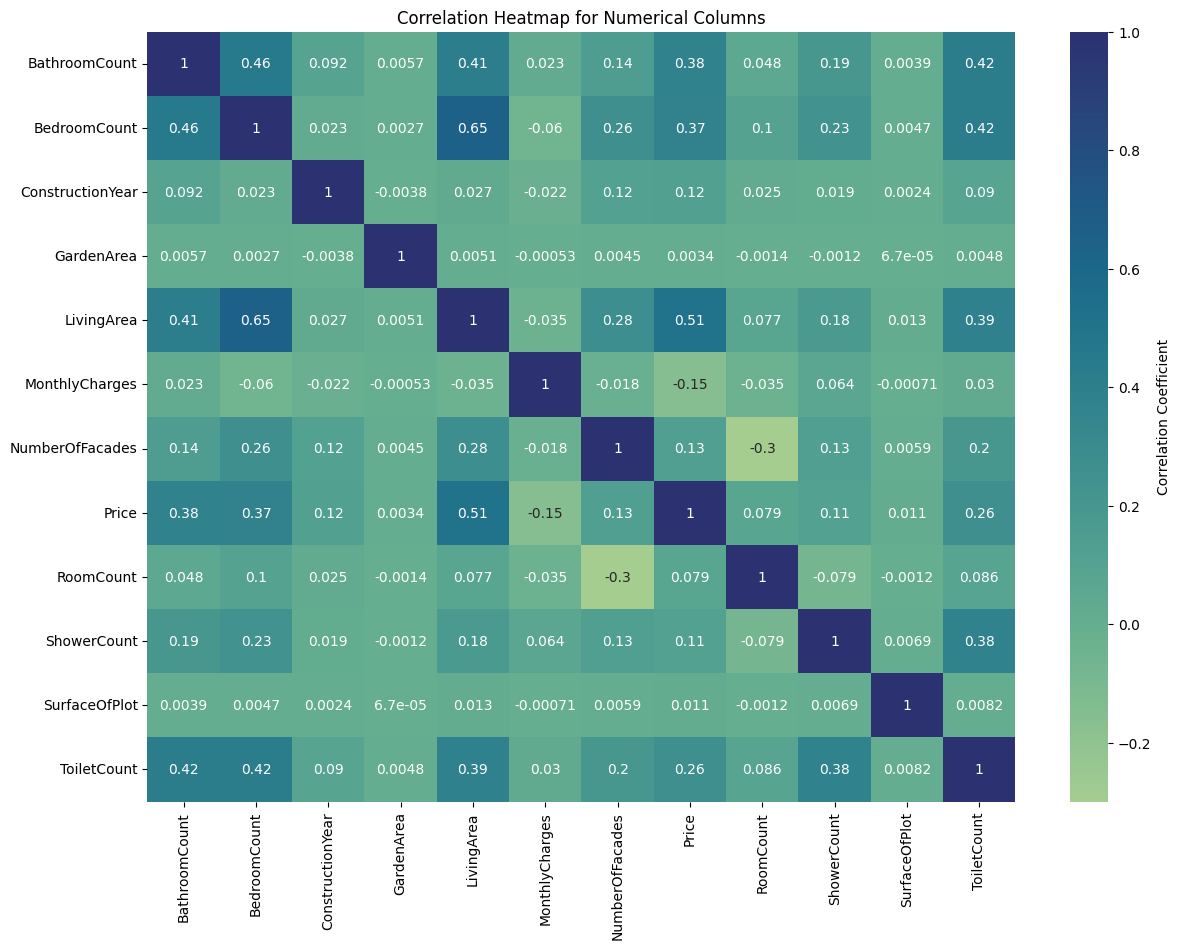

In [43]:
# Select numerical columns for correlation
numerical_columns = ['BathroomCount', 'BedroomCount', 'ConstructionYear', 'GardenArea', 
                     'LivingArea', 'MonthlyCharges', 'NumberOfFacades', 'Price', 
                     'RoomCount', 'ShowerCount', 'SurfaceOfPlot', 'ToiletCount']

# Compute the correlation matrix for numerical columns
correlation_matrix = data[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix for Numerical Columns:")
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

# For categorical columns, we need to convert them to dummy variables and then compute the correlation
categorical_columns = ['District', 'FloodingZone', 'Furnished', 'Garden', 'Kitchen', 
                       'Locality', 'PEB', 'PostalCode', 'Province', 'Region', 
                       'StateOfBuilding', 'SubtypeOfProperty', 'SwimmingPool', 
                       'Terrace', 'TypeOfProperty', 'TypeOfSale']

# Create dummy variables for categorical columns
data_dummies = pd.get_dummies(data[categorical_columns])

# Combine numerical columns with dummy variables
combined_data = pd.concat([data[numerical_columns], data_dummies], axis=1)

# Compute the correlation matrix for the combined data
combined_correlation_matrix = combined_data.corr()

# Print the combined correlation matrix
print("Combined Correlation Matrix:")
print(combined_correlation_matrix)

# Visualize the combined correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(combined_correlation_matrix, annot=False, cmap="crest", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap for All Columns")
plt.show()